# The Romer model


> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Model description

**Write out the model in equations here.** 

The Romer model is essentially the same as the Solow model. However, technological development is now an explicit function of investments in R&D (Research and development). There exist two sectors, one generate output and one generate new knowledge. The Labor force is divided into these two sectors, such that a part of the labor force are scientists / works in the R&D sector. The equation system is given by:

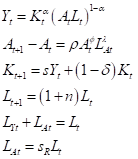

ρ is a constant productivity parameter. The parameter ϕ is the elasticity of existing knowledge (in other words, how easy it is to generate new knowledge). From ϕ we can describe two opposite effects:

Standing on shoulders: If ϕ>0 or close to 1 - new knowleadge is generated by existing ideas. 
Fishing out: If ϕ<0 - It gets harder and harder to generate new knowledge. 

λ is the efficieny of the scientists. A higher amount of working scientists results in a higher probability of two workers getting the exact same new idea, which only counts for one new idea, hence it is inefficient. This effects is called steppeing on toes and speaks for decreasing marginal product of labor in the R&D sector, hence 0<λ<1.

In the analysis we use per captia terms.

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

In [ ]:
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
sr = sm.symbols('sr')
g = sm.symbols('g')
n = sm.symbols('n')
a = sm.symbols('a')
y = sm.symbols('y')

In [ ]:
f = k**alpha
ssk = sm.Eq(k,((s*f*((1-sr)**(1-alpha))+(1-delta)*k)/((1+n)*(1+g))))
kss = sm.solve(ssk,k)[0]
kss

In [ ]:
# Define y 
ystar=((1-sr)**(1-alpha))*(k**alpha)

# Find the steady state for y
sy=ystar.subs(k,kss)
yss=sm.Eq(y,sy)
yss

In [ ]:
ssk_func = sm.lambdify((s,sr,g,n,delta,alpha),kss)

# Evaluate function
ssk_func(0.8,0.2,0.02,0.01,0.1,1/3)

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

In [ ]:
import numpy as np
import scipy.optimize as opt


# Set the parameter values as in the Romer model

alpha = 1/3  # Production function parameter

s = 0.8  # Savings rate

sr = 0.2  # Share of output invested in research

delta = 0.1  # Depreciation rate

n = 0.01  # Labor force growth rate

g = 0.02  # Technological growth rate


# Function to calculate steady state value

def romer_model(k_tilde, alpha, s, sr, delta, n, g):
    
    # Define the steady state equation
    f = lambda k: k**(alpha-1)
    obj_kss = lambda kss: kss - (1/((1+n)*(1+g)))*(s*kss**alpha*(1-sr)**(1-alpha)+(1-delta)*kss)
    result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')
    
    if result.converged:
        return result.root
    else:
        return None


# Calculate the steady state value

k_tilde_ss = romer_model(1, alpha, s, sr, delta, n, g)

if k_tilde_ss is not None:
    print(f"Steady state value of k_tilde is {k_tilde_ss:.4f}")
else:
    print("Failed to find the steady state value")

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 